In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("circle_alignment_reference_2.jpg")
if image is None:
    print("Error: Image not found.")
    exit()

known_min = 1
known_max = 20000

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)

circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=1,
                           param1=1, param2=2, minRadius=known_min, maxRadius=known_max)

output = image.copy()

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    circles = sorted(circles, key=lambda c: c[0])  # sort by x

    # Draw circles and centers
    for (x, y, r) in circles[:3]:  # limit to first 3 circles if available
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # green circle outline
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # red center dot

    left, center, right = circles[:3]
    distance = np.linalg.norm(left[:2] - right[:2])
    print(f"Centers: Left={left[:2]}, Center={center[:2]}, Right={right[:2]}")
    print(f"Distance between left and right: {distance}")
else:
    print("No circles detected.")

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Centers: Left=[ 2 86], Center=[ 2 58], Right=[ 3 31]
Distance between left and right: 55.00909015790027


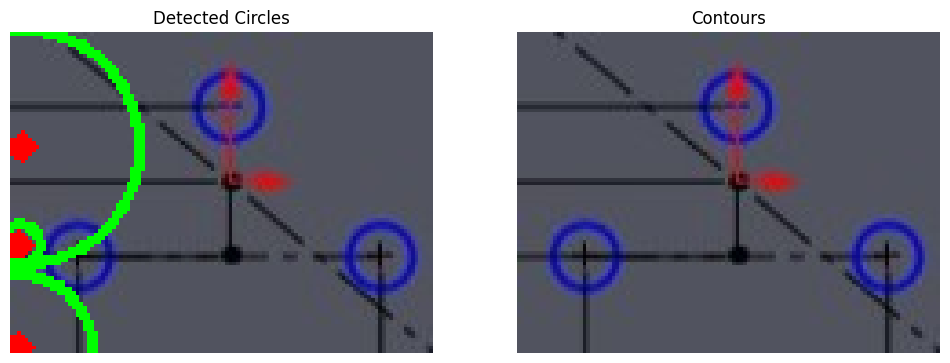

In [ ]:
# Draw contours on a copy of original image
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 2)  # blue contours

# Convert BGR to RGB for matplotlib display
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
contour_img_rgb = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Detected Circles")
plt.imshow(output_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Contours")
plt.imshow(contour_img_rgb)
plt.axis('off')

plt.show()